## Importações

In [12]:

import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [13]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

Epoch 1/40
18/18 [==============================] - 1s 7ms/step - loss: 2.0925 - accuracy: 0.1264 - val_loss: 2.0013 - val_accuracy: 0.2227
Epoch 2/40
18/18 [==============================] - 0s 2ms/step - loss: 1.8999 - accuracy: 0.3014 - val_loss: 1.8589 - val_accuracy: 0.2899
Epoch 3/40
18/18 [==============================] - 0s 3ms/step - loss: 1.7558 - accuracy: 0.4296 - val_loss: 1.7462 - val_accuracy: 0.3908
Epoch 4/40
18/18 [==============================] - 0s 2ms/step - loss: 1.6255 - accuracy: 0.5235 - val_loss: 1.6326 - val_accuracy: 0.4286
Epoch 5/40
18/18 [==============================] - 0s 2ms/step - loss: 1.4906 - accuracy: 0.5939 - val_loss: 1.5177 - val_accuracy: 0.4790
Epoch 6/40
18/18 [==============================] - 0s 2ms/step - loss: 1.3655 - accuracy: 0.6191 - val_loss: 1.4135 - val_accuracy: 0.5168
Epoch 7/40
18/18 [==============================] - 0s 2ms/step - loss: 1.2477 - accuracy: 0.6498 - val_loss: 1.3139 - val_accuracy: 0.5882
Epoch 8/40
18/18 [==

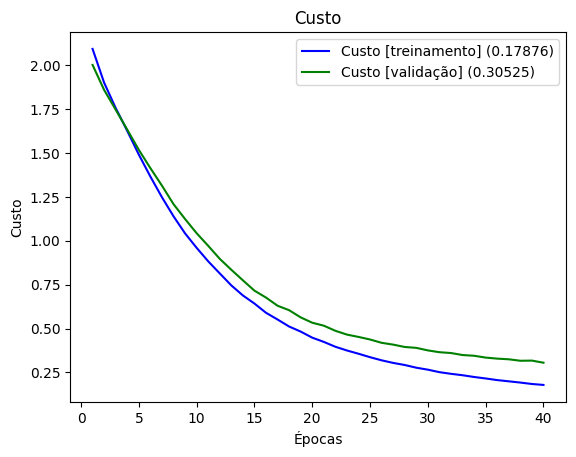

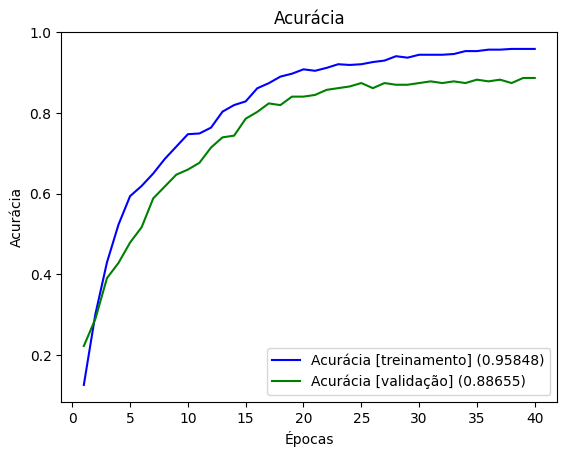

8/8 [==============================] - 0s 1ms/step - loss: 0.3053 - accuracy: 0.8866
Loss: 0.30525240302085876
Accuracy: 0.8865545988082886


In [14]:
# DATA/FEATURES para um voluntario
X = np.load('dataset.npy')

# LABELS
num_movements = 8 ## 8 movimentos
num_samples_per_movement = 99 ## 99 amostras por movimento
Y = [[str(i)] * num_samples_per_movement for i in range(1, num_movements + 1)]
Y = np.array(Y).flatten()

le = LabelEncoder()
Y = le.fit_transform(Y)

categorical_labels = to_categorical(Y, num_classes=len(set(Y)))

X_train, X_test, y_train, y_test = train_test_split(X, categorical_labels, test_size=0.3)

## desenvolvimento do modelo Keras para uma MLP
model = Sequential()

# input_dim = quantidade de caracteristicas
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))

model.add(Dense(32, activation='relu'))

# quantidade de classes
model.add(Dense(8, activation='softmax'))

# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

plot_history(history)

# Fazer previsões para o conjunto de teste
# y_pred_prob = model.predict(X_test)
# y_pred = np.argmax(y_pred_prob, axis=1)

# Converter os rótulos verdadeiros de volta para as categorias originais
# y_true = np.argmax(y_test, axis=1)

# Calcular a acurácia
# accuracy = accuracy_score(y_true, y_pred)
# print('Acurácia: %.2f%%' % (accuracy * 100))

# Calcular a matriz de confusão
# confusion = confusion_matrix(y_true, y_pred)
# print('Matriz de confusão:')
# print(confusion)

# Gerar o relatório de classificação
# report = classification_report(y_true, y_pred, digits=2)
# print(report)

loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)